In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = tf.keras.utils.to_categorical(train_labels), tf.keras.utils.to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='LeakyReLU', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='LeakyReLU'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='LeakyReLU'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='LeakyReLU'))
model.add(layers.Dropout(0.4))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(32, activation='LeakyReLU'))
model.add(layers.Dropout(0.4))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True,
                                       monitor='val_accuracy', mode='max')

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels), 
                    batch_size=64, callbacks=[checkpoint_callback])



Epoch 1/100
782/782 [==============================] - 10s 7ms/step - loss: 2.1097 - accuracy: 0.2067 - val_loss: 1.8067 - val_accuracy: 0.3676
Epoch 2/100
782/782 [==============================] - 5s 7ms/step - loss: 1.8337 - accuracy: 0.3182 - val_loss: 1.5703 - val_accuracy: 0.4330
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 1.6902 - accuracy: 0.3764 - val_loss: 1.4864 - val_accuracy: 0.4770
Epoch 4/100
782/782 [==============================] - 5s 7ms/step - loss: 1.6068 - accuracy: 0.4114 - val_loss: 1.4344 - val_accuracy: 0.4967
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5555 - accuracy: 0.4341 - val_loss: 1.3407 - val_accuracy: 0.5244
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5096 - accuracy: 0.4537 - val_loss: 1.3299 - val_accuracy: 0.5321
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 1.4655 - accuracy: 0.4690 - val_loss: 1.2812 - val_accuracy: 0.549

In [ ]:
best_model = models.load_model('best_model.h5')

In [ ]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8590 - accuracy: 0.7422
Test accuracy: 0.7422000169754028


In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Training accuracy:", train_acc[-1])
print("Validation accuracy:", val_acc[-1])

# Evaluate test accuracy
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Compute confusion matrix
pred_labels = best_model.predict(test_images)
pred_classes = np.argmax(pred_labels, axis=-1)
true_classes = np.argmax(test_labels, axis=-1)
cm = confusion_matrix(true_classes, pred_classes)

print("Confusion matrix:")
print(cm)

Training accuracy: 0.8187199831008911
Validation accuracy: 0.738099992275238
313/313 [==============================] - 1s 3ms/step - loss: 0.8590 - accuracy: 0.7422
Test accuracy: 0.7422000169754028
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[774  34  45  19  13   4  11   7  62  31]
 [ 14 846   4  13   2   2  13   4  19  83]
 [ 73   7 618  65  68  61  59  37   3   9]
 [ 14  12  54 580  44 159  66  42  13  16]
 [ 18   5  68  49 666  25  68  83  12   6]
 [ 14   6  43 191  42 623  18  52   4   7]
 [  3   4  33  61  22  14 854   3   3   3]
 [ 17   5  24  25  49  50   9 809   2  10]
 [ 55  28  14  14   3   5   5   3 846  27]
 [ 24  91   6  16   6   4   5  17  25 806]]


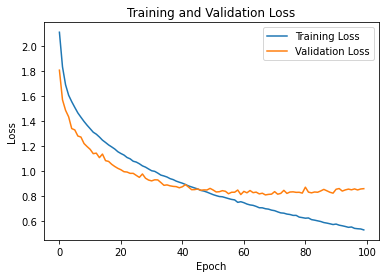

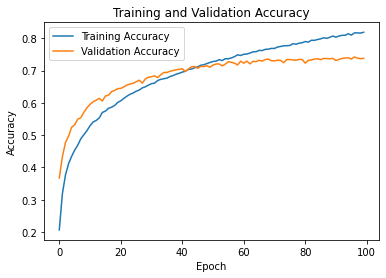

In [ ]:

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()